## 0. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from os.path import join
import os
import datetime
from datetime import date
import pickle
import math
import time
import pickle

# from google.colab import drive
# drive.mount('/content/drive')
# !ls drive/MyDrive/JUMP2DIGITAL

In [2]:
# DATA_PATH = 'drive/MyDrive/JUMP2DIGITAL/data/'
DATA_PATH = 'data/'
TRAIN_PATH= os.path.join(DATA_PATH, 'train.csv')
TEST_PATH = os.path.join(DATA_PATH, 'test.csv')

## 1. Analisis

In [3]:
df = pd.read_csv(TRAIN_PATH, sep=';')
df_test = pd.read_csv(TEST_PATH, sep=';')
print(df.shape, "raw shape test")
print(df_test.shape, "raw shape test")

(2100, 9) raw shape test
(900, 8) raw shape test


In [4]:
# Change columns name
old_cols = list(df.columns)
feat_cols = ['f'+str(x) for x in range(len(old_cols) - 1)]
new_cols = feat_cols + old_cols[-1:]
df.columns = new_cols
df_test.columns = feat_cols

target = 'target'

In [5]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,target
0,-0.458258,-0.579012,2.886009,-0.075516,1.674060,-2.431912,0.534850,-0.846473,2
1,1.626615,-0.028332,-1.443184,-1.007447,-0.989093,1.202627,-0.038211,-1.298616,0
2,1.721356,-0.137676,-1.322593,-1.333187,-0.723713,0.843285,-0.588495,0.066682,0
3,-0.715103,3.265915,-0.791030,-2.967881,2.497628,-0.277387,-0.551611,0.668354,2
4,2.944098,0.197871,-2.257025,1.032789,-4.104693,4.716115,-0.380813,-1.393825,0
...,...,...,...,...,...,...,...,...,...
2095,-1.490976,0.710351,0.563602,0.819782,0.622330,-0.260162,-0.430694,1.674863,0
2096,-1.100961,1.503310,0.389692,1.120231,-0.069433,1.037263,2.128583,0.385863,0
2097,-0.049519,1.334648,1.389703,-1.695882,1.967512,-1.252090,-0.529434,-2.322296,2
2098,0.872172,-2.125563,-1.142489,0.743429,-1.616948,0.345578,-0.357935,-0.814865,2


In [6]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.318846,0.005348,-0.327567,0.024042,0.085851,-0.065000,-0.025603,-0.004437,0.985238
std,1.575061,1.605428,1.479745,1.548154,1.788543,2.124337,1.015619,1.003342,0.815098
min,-5.031501,-6.004578,-5.470794,-5.296172,-5.719499,-4.910575,-3.850552,-3.541608,0.000000
25%,-1.406249,-1.119150,-1.368208,-1.083716,-1.136441,-1.613267,-0.701442,-0.659096,0.000000
50%,-0.431219,-0.162577,-0.532158,0.152545,0.102788,-0.431328,-0.007598,-0.019797,1.000000
75%,0.773896,1.127450,0.573801,1.173172,1.507492,1.162813,0.665932,0.667530,2.000000
max,5.388387,7.663112,4.869581,4.318758,6.033273,7.053420,4.400697,3.579874,2.000000


In [7]:
df_test.describe()

,f0,f1,f2,f3,f4,f5,f6,f7
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.385276,0.062003,-0.272598,-0.073202,0.238610,-0.191850,-0.031561,-0.001633
std,1.547693,1.555657,1.440845,1.501186,1.791003,2.106396,0.985244,1.026729
min,-5.787221,-3.674771,-4.629337,-5.053498,-5.370165,-5.061540,-3.225231,-3.519808
25%,-1.434168,-1.077770,-1.335606,-1.086698,-0.909621,-1.709935,-0.704612,-0.701739
50%,-0.500617,-0.017847,-0.459326,-0.000771,0.352712,-0.690707,-0.025951,-0.021752
75%,0.549975,1.134111,0.603355,1.048799,1.663170,0.944483,0.608235,0.669796
max,3.918199,5.795235,5.640333,4.438875,5.742810,6.634086,3.123964,3.284115


In [8]:
print("Duplicados?:", df.duplicated().any())

Duplicados?: False


### 1.1 Plots

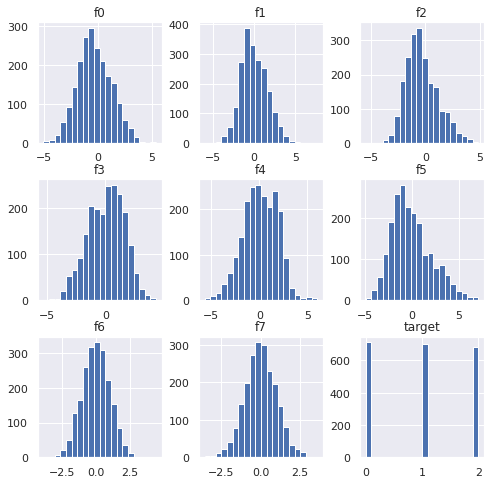

In [9]:
_ = df.hist(bins=20, figsize=(8, 8))

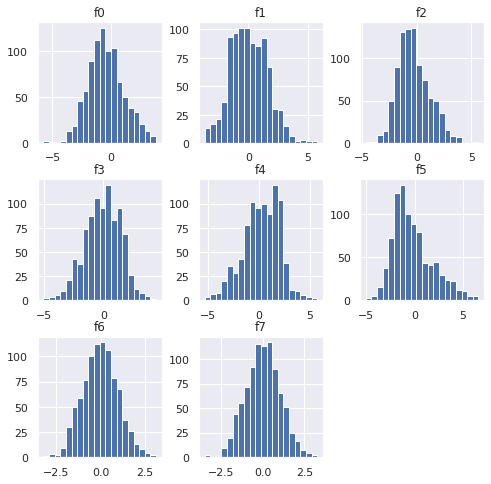

In [10]:
_ = df_test.hist(bins=20, figsize=(8, 8))

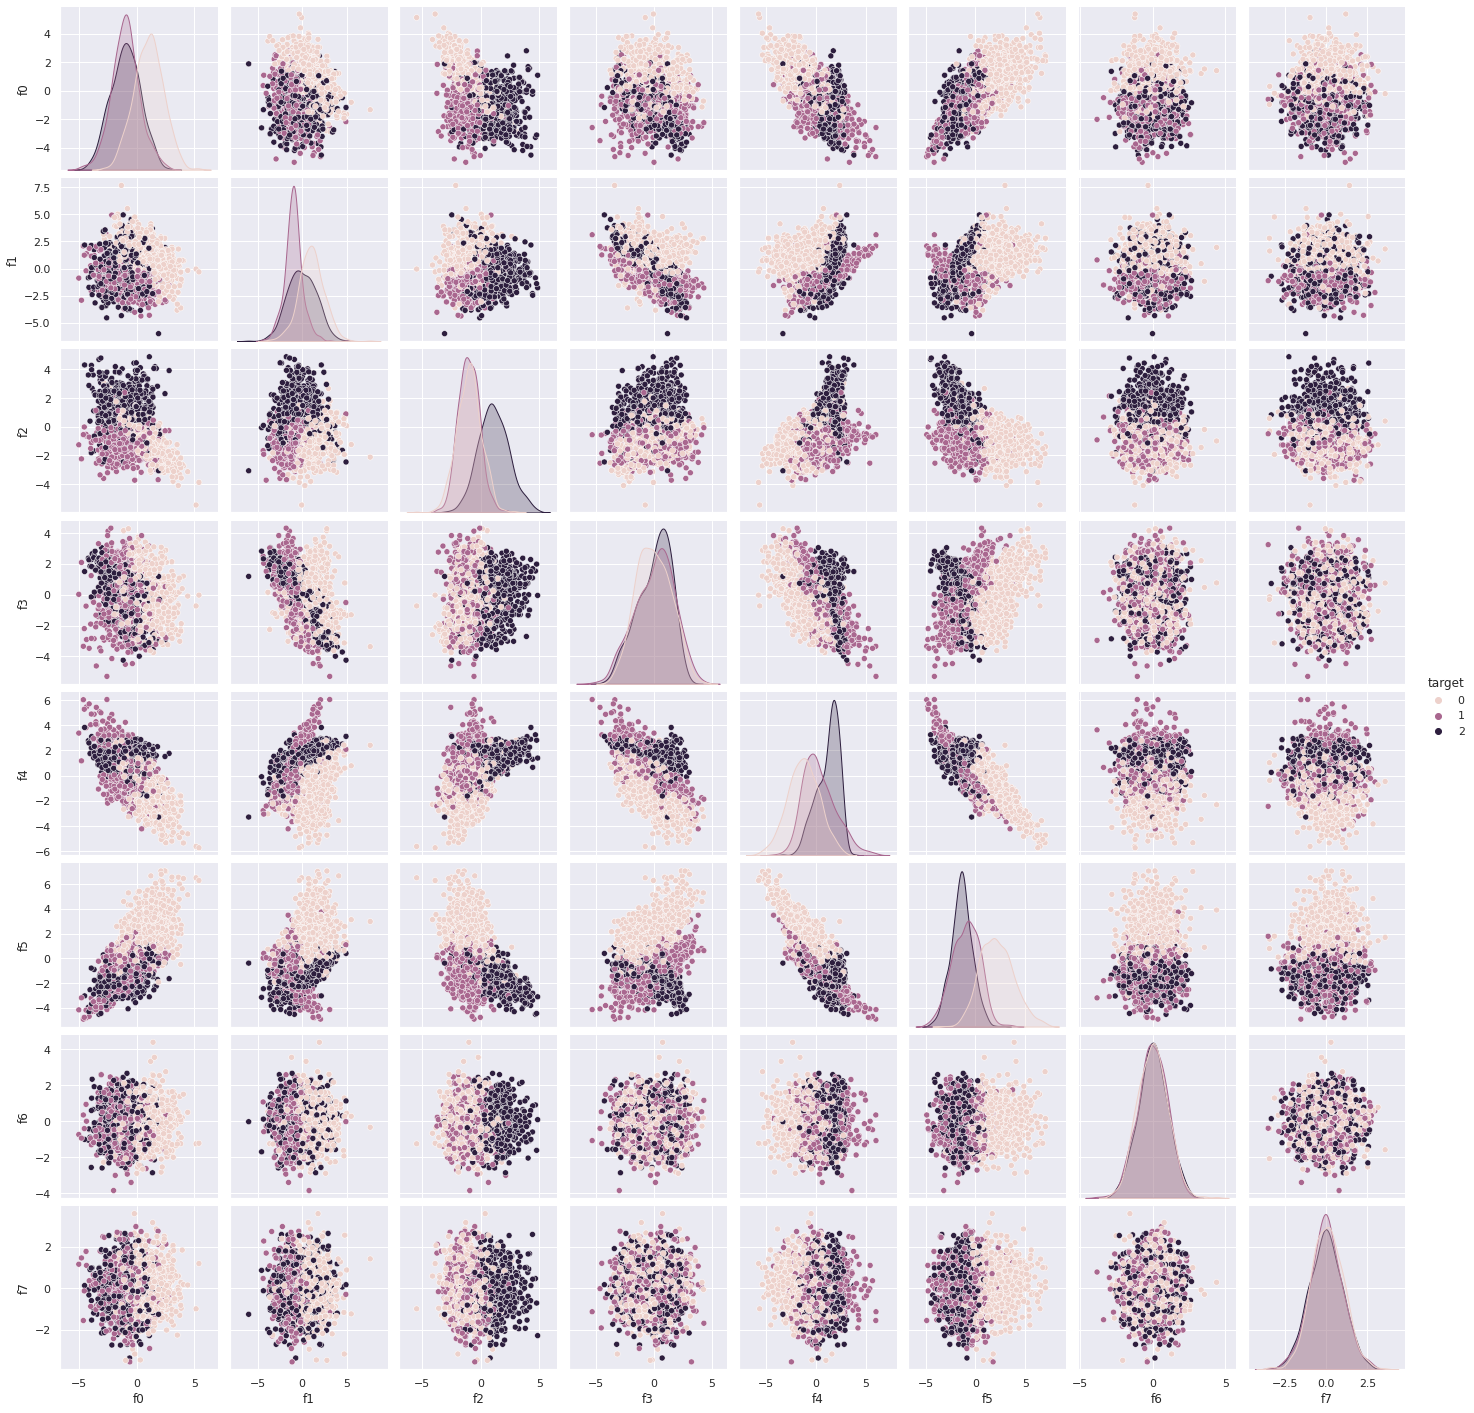

In [11]:
sns.pairplot(df, hue="target")

In [12]:
def correlation(df):
  corr_mat = df.corr(method='pearson', min_periods=1)

  fig, ax = plt.subplots(1, 1, figsize=(6, 5))
  sns.heatmap(corr_mat, cmap="YlGnBu", linewidths=0.5, linecolor='black')
  ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15)
  ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)
  ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
  plt.setp(ax.get_xticklabels(), rotation=-40, ha="right",
             rotation_mode="anchor")

  # ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
  fig.tight_layout()
  ax.set_title('Correlation map', fontsize=23)
  plt.show()

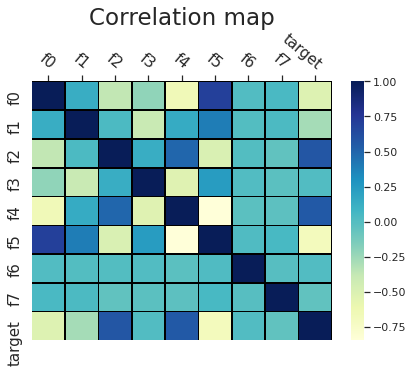

In [13]:
correlation(df)

In [14]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

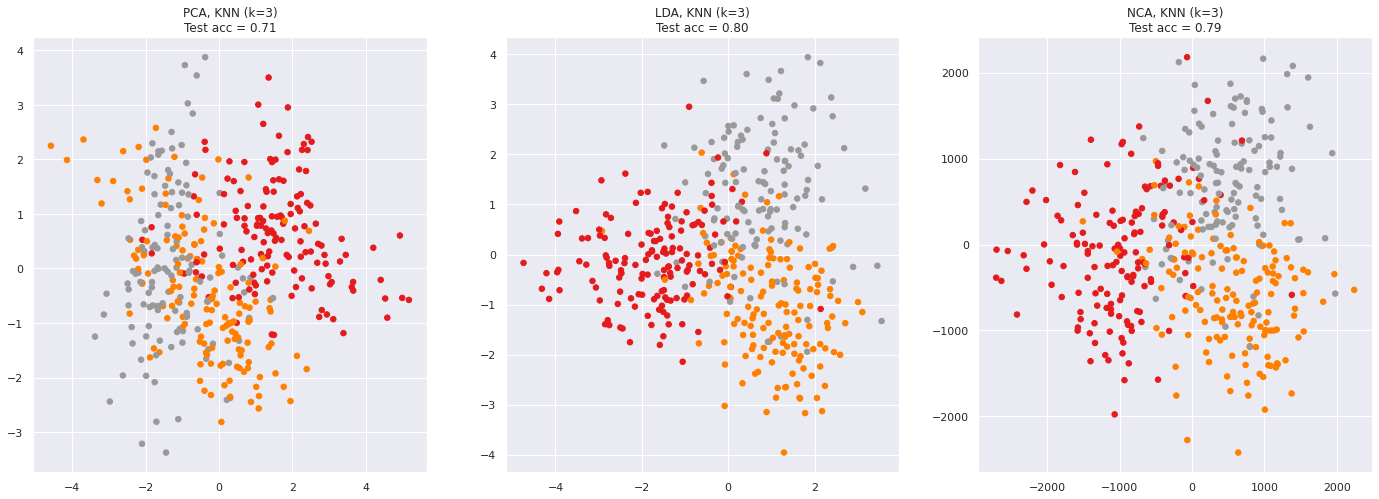

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
X_train, X_val, y_train, y_val = train_test_split(df[feat_cols], df[target], test_size=0.2, random_state=42)

n_classes = len(np.unique(y_train))
random_state = 0

pca = make_pipeline(
    StandardScaler(), 
    PCA(n_components=2, random_state=random_state)
)
lda = make_pipeline(
    StandardScaler(), 
    LinearDiscriminantAnalysis(n_components=2)
)
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

knn = KNeighborsClassifier(n_neighbors=n_classes)
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

fig, axs = plt.subplots(1, 3, figsize=(8*3, 8))
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    model.fit(X_train, y_train)
    knn.fit(model.transform(X_train), y_train)

    X_pred = model.transform(X_val)
    acc_knn = knn.score(X_pred, y_val)

    _ = axs[i].scatter(X_pred[:, 0], X_pred[:, 1], c=y_val, s=30, cmap="Set1")
    _ = axs[i].title.set_text("{}, KNN (k={})\nTest acc = {:.2f}".format(name, n_classes, acc_knn))
plt.show()

## 3.Train

KFOLD: 0 TRAIN: (1400, 8) VAL: (700, 8)
F1 (TRAIN | VAL):  1.0 | 0.9142
ACC (TRAIN | VAL):  1.0 | 0.9143
KFOLD: 1 TRAIN: (1400, 8) VAL: (700, 8)
F1 (TRAIN | VAL):  1.0 | 0.9169
ACC (TRAIN | VAL):  1.0 | 0.9171
KFOLD: 2 TRAIN: (1400, 8) VAL: (700, 8)
F1 (TRAIN | VAL):  1.0 | 0.8985
ACC (TRAIN | VAL):  1.0 | 0.8986

FINAL ACCURACY. TRAIN: 1.0, VAL: 0.91
CPU times: user 1min 26s, sys: 11.5 s, total: 1min 37s
Wall time: 46.4 s


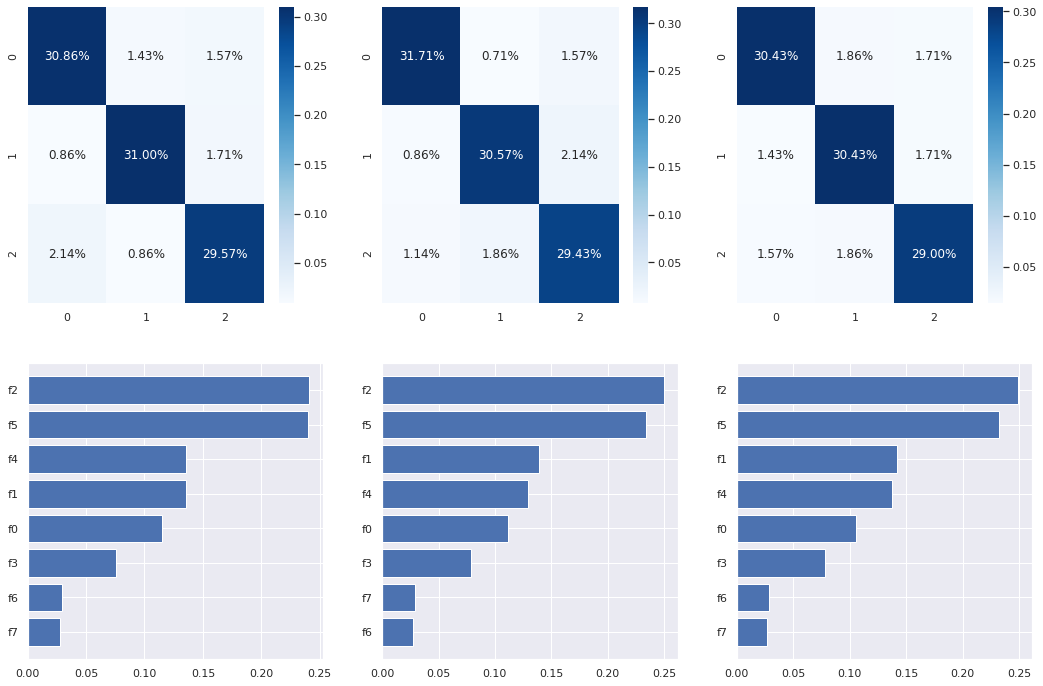

In [16]:
%%time
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor, ExtraTreesRegressor
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns

from sklearn.metrics import classification_report

target = 'target'

kfold = StratifiedKFold(n_splits=3, shuffle=False)
histories = []; evaluates = []

results = []
fig, axs = plt.subplots(2, 3, figsize=(6*3, 6*2))

for index, (train_index, val_index) in enumerate(kfold.split(df[feat_cols], df[target])):

  X_train, X_val = df.iloc[train_index], df.iloc[val_index]
  X_train, y_train = X_train.drop(target, axis=1), X_train[target]
  X_val, y_val = X_val.drop(target, axis=1), X_val[target]
  print("KFOLD:", index, "TRAIN:", X_train.shape, "VAL:", X_val.shape)

  rf = RandomForestClassifier(random_state=0, max_depth=None, n_estimators=5000, n_jobs=-1, class_weight={0:0.25,1:0.25,2:0.5})

  model = rf
  model = model.fit(X_train, y_train)

  train_pred = model.predict(X_train).flatten()
  val_pred = model.predict(X_val).flatten()

  train_acc = accuracy_score(y_train, train_pred)
  val_acc = accuracy_score(y_val, val_pred)
  train_f1 = f1_score(y_train, train_pred, average='macro')
  val_f1 = f1_score(y_val, val_pred, average='macro')

  print("F1 (TRAIN | VAL): ", round(train_f1, 4), "|", round(val_f1, 4))
  print("ACC (TRAIN | VAL): ", round(train_acc, 4), "|", round(val_acc, 4))
  results.append([train_acc, val_acc])

  # print(classification_report(y_val, val_pred))

  # Confusion Matrix
  cf_matrix = confusion_matrix(y_val, val_pred)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=axs[0][index])

  # Random Forest Feature Importance
  sorted_idx = rf.feature_importances_.argsort()
  labels = np.array(feat_cols)[sorted_idx]
  axs[1][index].barh(labels, rf.feature_importances_[sorted_idx])

results = np.array(results)
results_mean = results.mean(axis=0)
print(f"\nFINAL ACCURACY. TRAIN: {round(results_mean[0],4)}, VAL: {round(results_mean[1], 4)}")

In [17]:
%%time
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df[feat_cols], df[target], test_size=0.2, random_state=42)
f1 = make_scorer(f1_score , average='macro')

param_grid = {
    'n_estimators': [500, 800, 2000],
    'max_depth' : [8, 10, 20, None],
    'max_features': ['log2'],
    'criterion' :['entropy'],
    'class_weight' : [
        None, 
        {0:0.25,1:0.25,2:0.5}, # target=2 more weight
        {0:0.25,1:0.5,2:0.25}, # target=1 more weight
        {0:0.2,1:0.4,2:0.4},   # target=1&2 more weight
    ],
}
rf = RandomForestClassifier()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring=f1)
gs.fit(X_train, y_train)

print(gs.best_params_)

{'class_weight': {0: 0.25, 1: 0.25, 2: 0.5}, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 800}
CPU times: user 3.68 s, sys: 107 ms, total: 3.78 s
Wall time: 2min 11s


In [18]:
model = RandomForestClassifier(**gs.best_params_)

model.fit(X_train, np.ravel(y_train))
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

train_acc = accuracy_score(y_train, train_pred)
val_acc = accuracy_score(y_val, val_pred)
train_f1 = f1_score(y_train, train_pred, average='macro')
val_f1 = f1_score(y_val, val_pred, average='macro')

print("F1 (TRAIN | VAL): ", round(train_f1, 4), "|", round(val_f1, 4))
print("ACC (TRAIN | VAL): ", round(train_acc, 4), "|", round(val_acc, 4))

F1 (TRAIN | VAL):  1.0 | 0.8995
ACC (TRAIN | VAL):  1.0 | 0.9


## Create submission

In [ ]:
test_pred = model.predict(df_test)

In [ ]:
df_submit[['test_index', 'Target']].to_csv("predictions.csv", header=True, index=False)

In [ ]:
df_submit[['test_index', 'Target']].to_json('predictions.json', orient="table", index=False, indent=2)